In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import torch
import math
from UnarySim.sw.bitstream.gen import RNG, SourceGen, BSGen
from UnarySim.sw.metric.metric import NormStability, NSbuilder
import matplotlib.pyplot as plt
import time
import math

In [24]:
def worst_stb(dep_it=[6],threshold=0.05,mod="unipolar"):
    for dep in dep_it:
        plt.figure(figsize = (4,3))
        len = 2**dep
        temp = []
        T = threshold
        x = []
        y = []
        for ite in range(len + 1):
            val = torch.tensor([1.0*ite/len])
            x.append(val.item())
            normstb = NormStability(val, mode=mod, threshold=T).cpu()
            rng = RNG(bitwidth=dep, dim=1, mode="Race")()
            if val < 0.5:
                src = SourceGen(val, dep, mod)()
            else:
                src = SourceGen(1-val, dep, mod)()
            bs = BSGen(src, rng)
            idx = torch.zeros(1).type(torch.float)
            for j in range(len):
                if val < 0.5:
                    out = bs(idx)
                else:
                    out = 1 - bs(idx)
                normstb.Monitor(out)
                idx = idx.add(1)
            y.append(normstb())
        
        plt.plot(x,y)
        plt.xlabel("value")
        plt.ylabel("min_stb")
        plt.title("Distribution of min_stb for dep=%d"%dep + ", T=%f"%threshold)        
        plt.show()

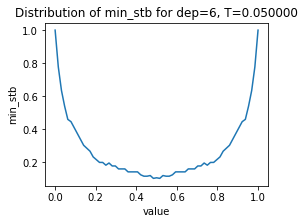

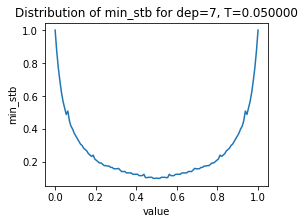

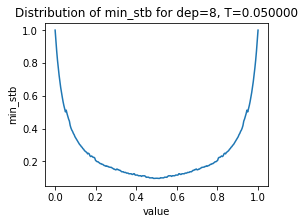

In [7]:
worst_stb([6,7,8])

In [90]:
def max_stb(dep_it=[6],threshold=0.05):
    for dep in dep_it:
        plt.figure(figsize = (4,3))
        len = 2**dep
        temp = []
        T = threshold
        x = []
        y = []
        for ite in range(len + 1):
            val = torch.tensor([1.0*ite/len])
            x.append(val.item())
            normstb = NormStability(val, mode="unipolar", threshold=T).cpu()
            rng = RNG(bitwidth=dep, dim=1, mode="Race")()
            if val < 0.5:
                src = SourceGen(val, dep, "unipolar")()
            else:
                src = SourceGen(1-val, dep, "unipolar")()
            bs = BSGen(src, rng)
            idx = torch.zeros(1).type(torch.float)
            for j in range(len):
                if val < 0.5:
                    out = bs(idx)
                else:
                    out = 1 - bs(idx)
                normstb.Monitor(out)
                idx = idx.add(1)
            normstb()
            y.append(normstb.max_stab)

        plt.plot(x,y)
        plt.xlabel("value")
        plt.ylabel("max_stb")
        plt.title("Distribution of max_stb for dep=%d"%dep + ", T=%f"%threshold)
        plt.show()

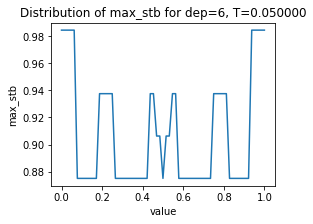

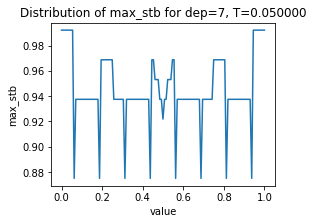

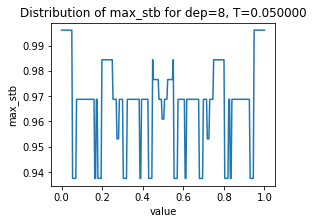

In [91]:
max_stb([6,7,8])

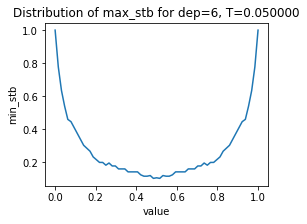

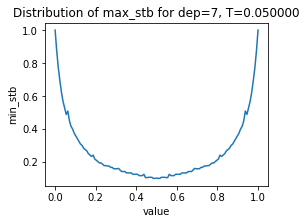

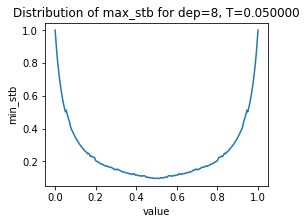

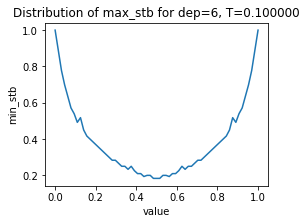

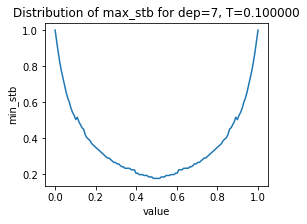

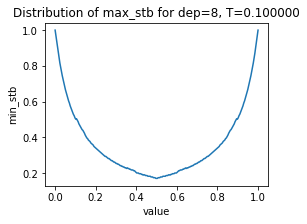

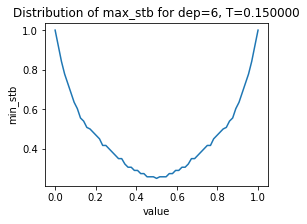

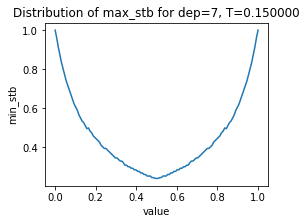

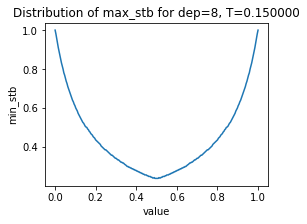

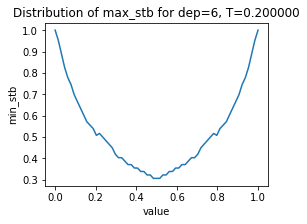

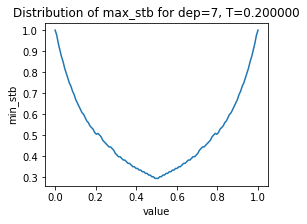

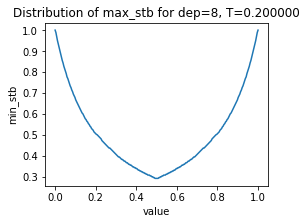

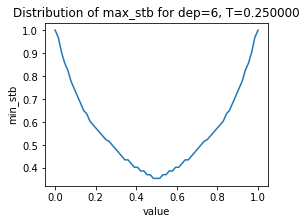

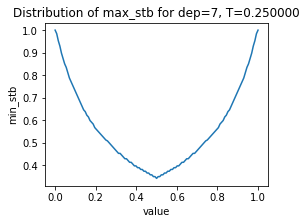

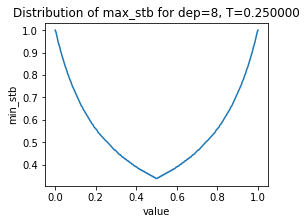

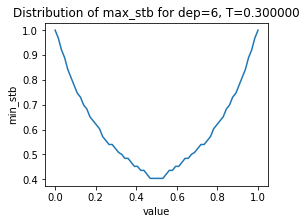

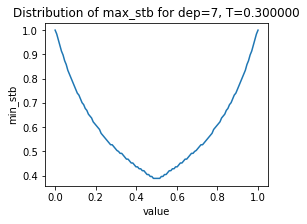

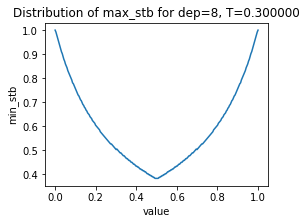

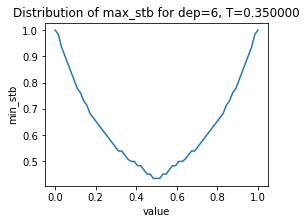

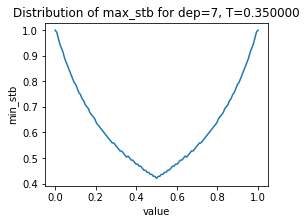

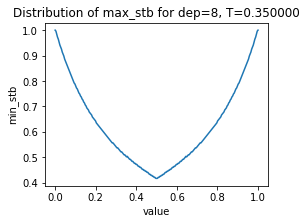

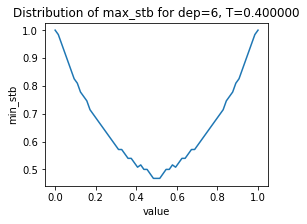

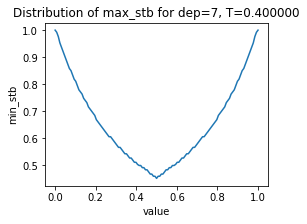

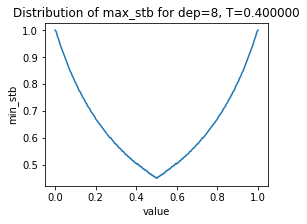

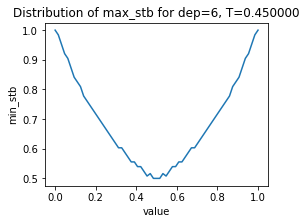

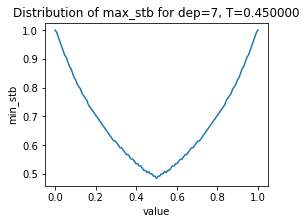

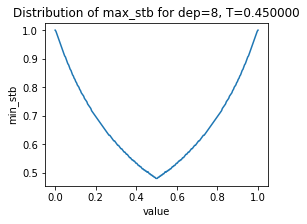

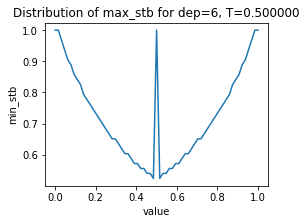

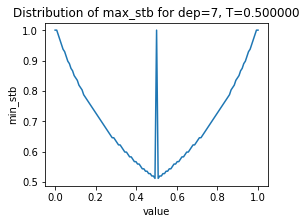

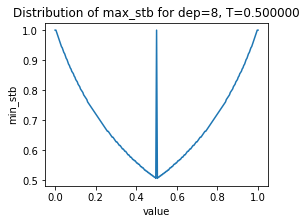

In [92]:
## Test on threshold
for t in range(10):
    threshold = 0.05 + t*0.05
    worst_stb([6,7,8], threshold)

In [33]:
def worst_stb_bipolar(dep_it=[6],threshold=0.05,mod="bipolar"):
    for dep in dep_it:
        plt.figure(figsize = (4,3))
        len = 2**dep
        temp = []
        T = threshold
        x = []
        y = []
        for ite in range(len + 1):
            val = torch.tensor([2*(1.0*ite/len)-1])
            x.append(val.item())
            normstb = NormStability(val, mode=mod, threshold=T).cpu()
            rng = RNG(bitwidth=dep, dim=1, mode="Race")()
            if val < 0:
                src = SourceGen(val, dep, mod)()
            else:
                src = SourceGen(-val, dep, mod)()
            bs = BSGen(src, rng)
            idx = torch.zeros(1).type(torch.float)
            for j in range(len):
                if val < 0:
                    out = bs(idx)
                else:
                    out = 1 - bs(idx)
                normstb.Monitor(out)
                idx = idx.add(1)
            y.append(normstb())
        
        plt.plot(x,y)
        plt.xlabel("value")
        plt.ylabel("min_stb")
        plt.title("Distribution of min_stb for dep=%d"%dep + ", T=%f"%threshold)        
        plt.show()

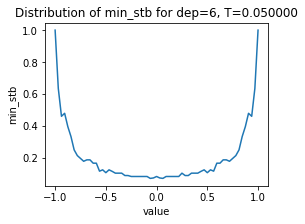

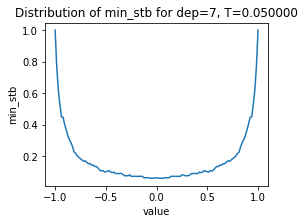

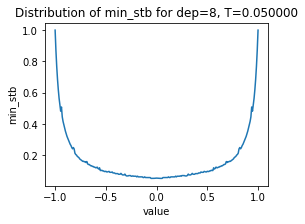

In [34]:
worst_stb_bipolar([6,7,8],0.05,"bipolar")